# Tanzania Wells Analysis
## by Allison Ward, Sarah Prusaitis, and Monica Pecha

## Overview
This project analyzes the factors of successful wells in the Lake Victoria basin of Tanzania and provides key recommendations to initiate investment in further development of wells in the basin to ensure clean potable water for all residents.

## Business Understanding
NGOs are looking to invest in the establishment of wells to provide clean drinking water for all Tanzanians beginning with the Lake Victoria basin. This analysis provides recommendations for well type, water source, and managment practices to ensure the most successful well development model.

The dataset was taken from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/), supplied by [Taarifa](https://taarifa.org/) and the [Tanzanian Ministry of Water](https://www.maji.go.tz/). These data were collected from 2011-2013.

## Data limitations
There are limitations to this dataset and analysis. The year of construction of the well was thought to be an important factor, but due to the large volume of missing data it was not included in the analysis. This analysis focused on buidling new well systems based on the predicton of successful wells from existing wells. For this reason we categorized the ternary well functionality target as binary and included the functioning but in need of repair wells with the non functioning wells to ensure our. This could have led to misclassification. Regression model coefficients were exponentiated and probabilities were calculated making for interpretable results, but without confidence intervals for these coefficients it's difficult to understand what factors are significant.

# Table of Contents

- Exploratory Data Analysis
  - EDA Part 1 - Initial Analysis
  - EDA Part 2 - Statistical Analysis
- Training the Model
    - Performing Train-Test Split
    - Preprocessing
    - Baseline (Dummy) Model
    - Preliminary Model 1
    - Preliminary Model 2
- Testing the Model
    - Transforming the Test Set
    - Modeling the Test Set
- Interpreting Results

# Exploratory Data Analysis (EDA)

## EDA Part 1 - Initial Analysis

EDA began with importing the necessary packages, reading in our datasets, and analyzing each dataset individually. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [3]:
# this ensures that each time you run a cell, you're working on a copy of the dataframe and not the original dataframe. 
# different versions of pandas will differ on this
pd.options.mode.copy_on_write = True

In [4]:
# Reading in our datasets to explore
df1 = pd.read_csv('data/test_set_values.csv')
df2= pd.read_csv('data/training_set_labels.csv')
df3 = pd.read_csv('data/training_set_values.csv')

In [5]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [7]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [9]:
df3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

After analyzing each dataframe, a few observations can be made. Of note, quite a few columns are missing values. Additionally, most variables are categorical and listed as the 'object' datatype. The next step was to merge dataframes 2 and 3, which include the independent and dependent variables that were provided as training materials. 

In [11]:
# merging dataframes 2 and 3 on id
df4 = df3.merge(df2, on = "id")
df4.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


After exploring each of the datasets thoroughly, columns were dropped that were duplicates of other columns or otherwise not relevant to the scope of the analysis. It was also found that some columns had values that represented null values, such as construction years that were listed as 0, that would be detrimental to the model and therefore removed. Lastly, the data was filtered for wells in the Lake Victoria basin that were communal standpipe wells or hand pump wells, as per the business problem.

In [12]:
# dropping irrelevant columns
to_drop = ["scheme_name", "id", "public_meeting", 'population', 'lga', 'permit', 'quantity', "payment_type", "ward", "management", "water_quality", "wpt_name", "installer", "funder", "source_type", "subvillage", "extraction_type", "extraction_type_group", "source", "scheme_management", "construction_year", "quantity_group", "waterpoint_type", "amount_tsh", "region_code", "district_code", "num_private", "date_recorded", "recorded_by"]
df4.drop(to_drop, axis=1, inplace = True)

In [13]:
# dropping any wells that are not located in the Lake Victoria basin (our stakeholder wants to focus on one region)
df5 = df4.drop(df4.index[df4['basin'] != 'Lake Victoria'])
df5.head()

,gps_height,longitude,latitude,basin,region,extraction_type_class,management_group,payment,quality_group,source_class,waterpoint_type_group,status_group
1,1399,34.698766,-2.147466e+00,Lake Victoria,Mara,gravity,user-group,never pay,good,surface,communal standpipe,functional
4,0,31.130847,-1.825359e+00,Lake Victoria,Kagera,gravity,other,never pay,good,surface,communal standpipe,functional
9,0,30.626991,-1.257051e+00,Lake Victoria,Kagera,handpump,user-group,never pay,good,groundwater,hand pump,functional
18,1162,32.920154,-1.947868e+00,Lake Victoria,Mwanza,other,user-group,never pay,milky,groundwater,other,functional needs repair
21,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,handpump,user-group,unknown,unknown,groundwater,hand pump,functional


In [14]:
# dropping the column 'basin' since we filtered for only datapoints in the Lake Victoria basin
df5.drop(['basin'], axis=1, inplace = True)

In [15]:
# dropping any wells that are not a communal standpipe or hand pump
fdf = df5[df5['waterpoint_type_group'].isin(['communal standpipe', 'hand pump'])]

In [16]:
# renaming the column "status_group" to "target"
fdf.rename(columns={"status_group": "target"}, inplace= True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8330 entries, 1 to 59385
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   region                 8330 non-null   object 
 4   extraction_type_class  8330 non-null   object 
 5   management_group       8330 non-null   object 
 6   payment                8330 non-null   object 
 7   quality_group          8330 non-null   object 
 8   source_class           8330 non-null   object 
 9   waterpoint_type_group  8330 non-null   object 
 10  target                 8330 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 780.9+ KB


In [17]:
# Checking to see counts of each of our target values
fdf['target'].value_counts()

target
functional                 4527
non functional             2967
functional needs repair     836
Name: count, dtype: int64

It was determined that wells categorized as "functional needs repair" should be grouped with wells that are non functional. Since this analysis assesses factors that contribute to a well functioning appropriately, if a well is in need of repair it is not useful for this analysis and likely not serving its community as effectively as it could be. 

In [18]:
# changing any row that says "functional needs repair" to "non functional"
fdf.replace({'target': {'functional needs repair': 'non functional'}}, inplace=True)

In [19]:
# sanity check
fdf['target'].value_counts()

target
functional        4527
non functional    3803
Name: count, dtype: int64

In [20]:
# changing our target columns to be numeric instead of categorical
fdf.replace({'target': {'functional': '1'}}, inplace=True)
fdf.replace({'target': {'non functional': '0'}}, inplace=True)

In [21]:
# sanity check
fdf['target'].value_counts()

target
1    4527
0    3803
Name: count, dtype: int64

The next step was to look at each of the remaining columns individually to determine its contents.

In [22]:
fdf['gps_height'].describe()

count    8330.000000
mean      343.155582
std       589.799612
min         0.000000
25%         0.000000
50%         0.000000
75%      1145.000000
max      2056.000000
Name: gps_height, dtype: float64

In [23]:
fdf['longitude'].describe()

count    8330.000000
mean       26.843877
std        12.726143
min         0.000000
25%        30.824277
50%        32.763739
75%        33.671843
max        35.511809
Name: longitude, dtype: float64

In [24]:
fdf['latitude'].describe()

count    8.330000e+03
mean    -1.817385e+00
std      1.051853e+00
min     -3.926611e+00
25%     -2.687290e+00
50%     -1.855223e+00
75%     -1.301407e+00
max     -2.000000e-08
Name: latitude, dtype: float64

In [25]:
fdf['region'].value_counts()

region
Mwanza       2389
Kagera       2289
Shinyanga    1896
Mara         1724
Arusha         32
Name: count, dtype: int64

In [26]:
fdf['extraction_type_class'].value_counts()

extraction_type_class
handpump        4989
gravity         2053
submersible      523
other            291
motorpump        290
rope pump        182
wind-powered       2
Name: count, dtype: int64

In [27]:
fdf['management_group'].value_counts()

management_group
user-group    7337
other          356
parastatal     328
commercial     227
unknown         82
Name: count, dtype: int64

In [28]:
fdf['payment'].value_counts()

payment
never pay                5199
unknown                  1259
pay monthly               556
pay per bucket            409
other                     406
pay when scheme fails     292
pay annually              209
Name: count, dtype: int64

In [29]:
fdf['quality_group'].value_counts()

quality_group
good        6976
salty        941
unknown      303
milky         70
colored       31
fluoride       9
Name: count, dtype: int64

In [30]:
fdf['source_class'].value_counts()

source_class
groundwater    6737
surface        1578
unknown          15
Name: count, dtype: int64

In [31]:
fdf['waterpoint_type_group'].value_counts()

waterpoint_type_group
hand pump             5269
communal standpipe    3061
Name: count, dtype: int64

Next, there were multiple features to engineer. Domain knowledge was used to group together classes based on similar qualities. 

In [32]:
# creating groups for extraction_type_class
fdf.replace({'extraction_type_class': {'handpump': 'manual'}}, inplace=True)
fdf.replace({'extraction_type_class': {'gravity': 'other'}}, inplace=True)
fdf.replace({'extraction_type_class': {'submersible': 'mechanical'}}, inplace=True)
fdf.replace({'extraction_type_class': {'motorpump': 'mechanical'}}, inplace=True)
fdf.replace({'extraction_type_class': {'rope pump': 'manual'}}, inplace=True)
fdf.replace({'extraction_type_class': {'wind-powered': 'other'}}, inplace=True)
# sanity check
fdf['extraction_type_class'].value_counts()

extraction_type_class
manual        5171
other         2346
mechanical     813
Name: count, dtype: int64

In [33]:
# creating groups for quality_group
fdf.replace({'quality_group': {'salty': 'other'}}, inplace=True)
fdf.replace({'quality_group': {'milky': 'other'}}, inplace=True)
fdf.replace({'quality_group': {'colored': 'other'}}, inplace=True)
fdf.replace({'quality_group': {'fluoride': 'other'}}, inplace=True)
# sanity check
fdf['quality_group'].value_counts()

quality_group
good       6976
other      1051
unknown     303
Name: count, dtype: int64

In [34]:
# creating groups for payment
fdf.replace({'payment': {'pay when scheme fails': 'other'}}, inplace=True)
fdf.replace({'payment': {'pay monthly': 'other'}}, inplace=True)
fdf.replace({'payment': {'pay per bucket': 'other'}}, inplace=True)
fdf.replace({'payment': {'pay annually': 'other'}}, inplace=True)
# sanity check
fdf['payment'].value_counts()

payment
never pay    5199
other        1872
unknown      1259
Name: count, dtype: int64

Next, we continued our data exploration by creating multiple visuals.

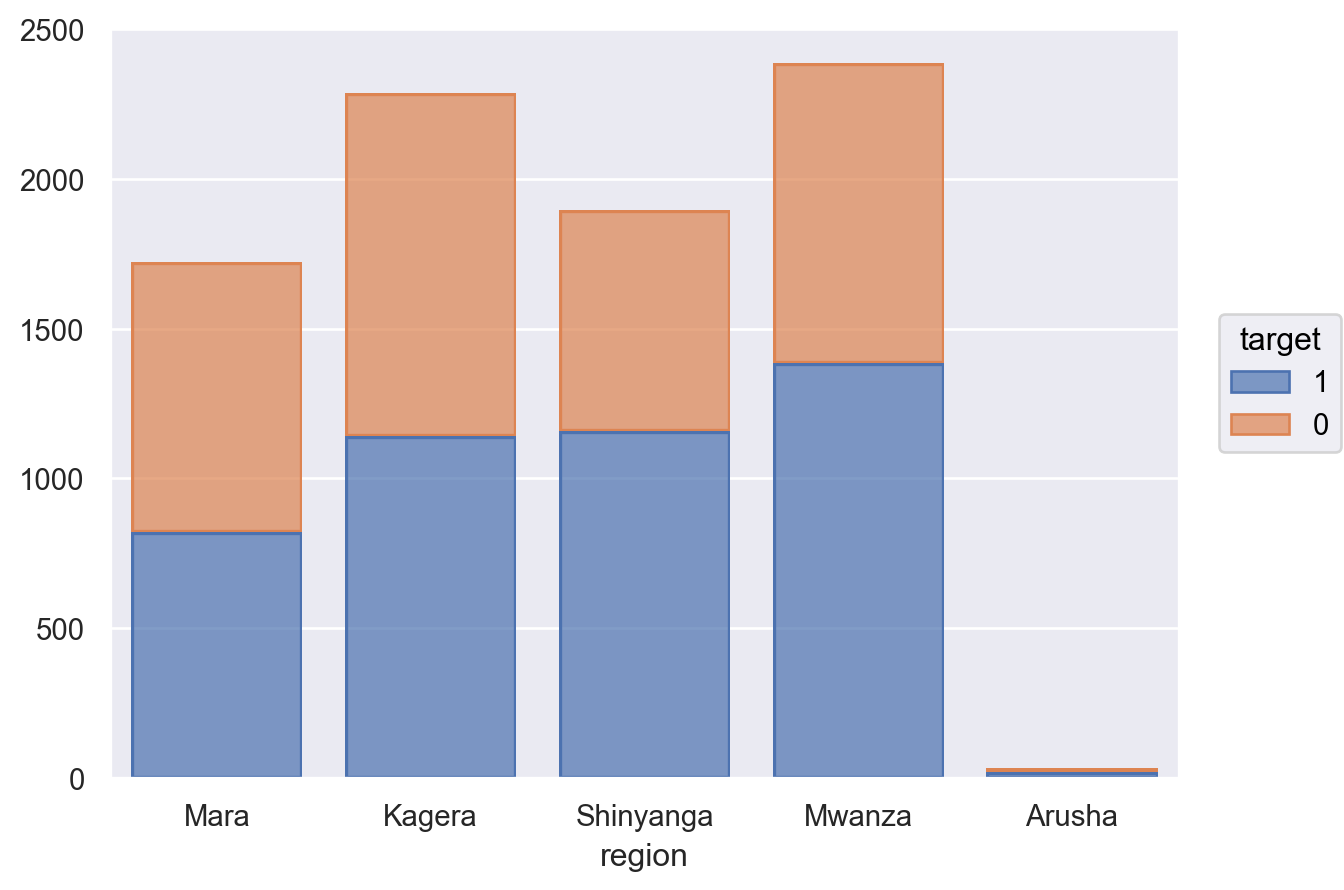

In [35]:
# comparing our target by region

#makes the plot bigger
so.Plot.config.display["scaling"] = 1.25

# the plot
so.Plot(fdf, x="region", color="target").add(so.Bar(), so.Count(), so.Stack())

In [36]:
# comparing percentages of functioning vs nonfunctioning by extraction type class
print('Functioning Wells % by')
print(fdf["region"].loc[fdf['target'] == '1'].value_counts(normalize=True) * 100)
print('___________')
print('Nonfunctioning Wells % by')
print(fdf["region"].loc[fdf['target'] == '0'].value_counts(normalize=True) * 100)

Functioning Wells % by
region
Mwanza       30.594213
Shinyanga    25.601944
Kagera       25.226419
Mara         18.113541
Arusha        0.463883
Name: proportion, dtype: float64
___________
Nonfunctioning Wells % by
region
Kagera       30.160400
Mwanza       26.400210
Mara         23.770707
Shinyanga    19.379437
Arusha        0.289245
Name: proportion, dtype: float64


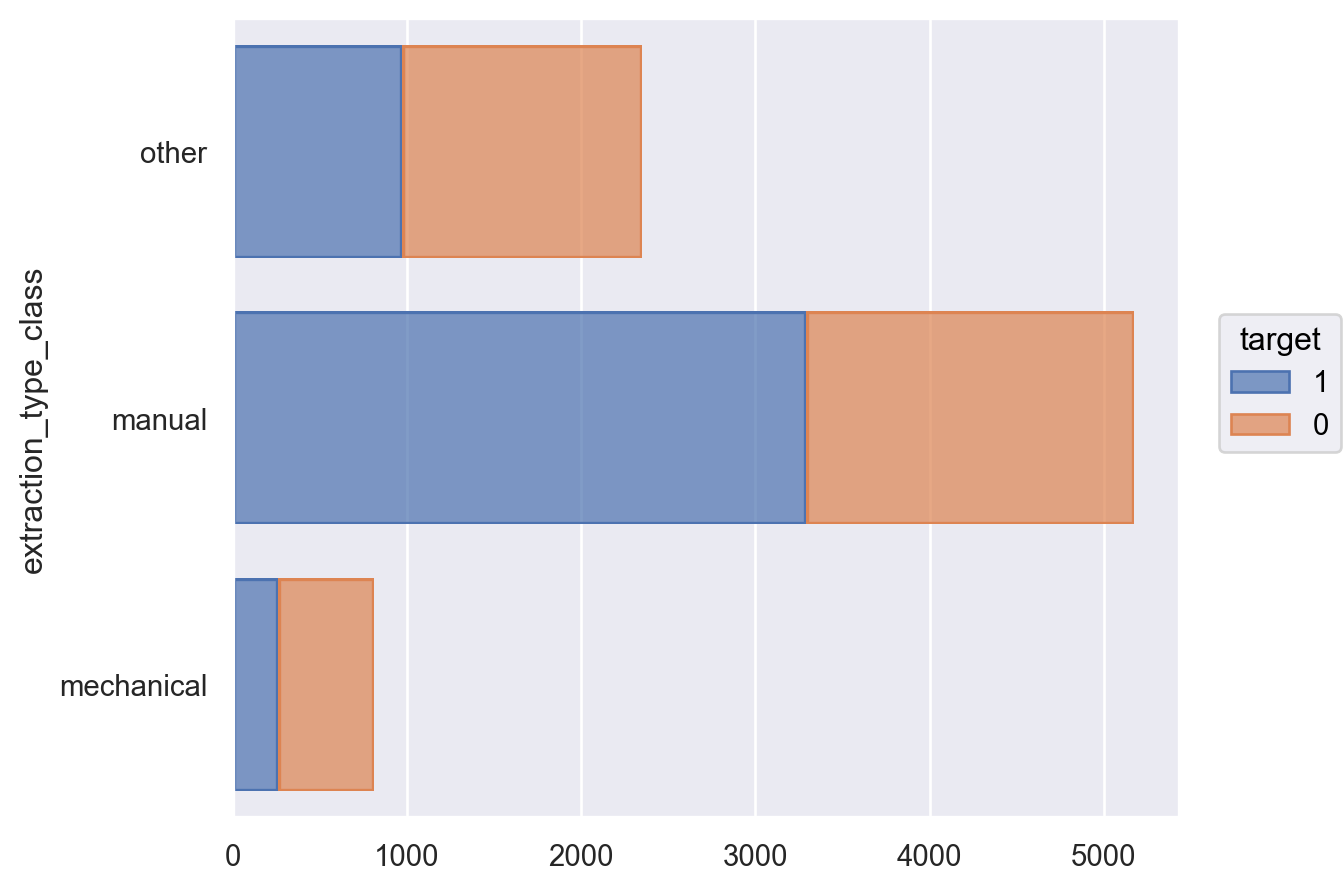

In [37]:
# comparing our target by extraction type
so.Plot(fdf, y="extraction_type_class", color="target").add(so.Bar(), so.Count(), so.Stack())

In [38]:
# comparing percentages of functioning vs nonfunctioning by extraction type class
print('Functioning Wells % by')
print(fdf["extraction_type_class"].loc[fdf['target'] == '1'].value_counts(normalize=True) * 100)
print('___________')
print('Nonfunctioning Wells % by')
print(fdf["extraction_type_class"].loc[fdf['target'] == '0'].value_counts(normalize=True) * 100)

Functioning Wells % by
extraction_type_class
manual        72.697150
other         21.515352
mechanical     5.787497
Name: proportion, dtype: float64
___________
Nonfunctioning Wells % by
extraction_type_class
manual        49.434657
other         36.076781
mechanical    14.488562
Name: proportion, dtype: float64


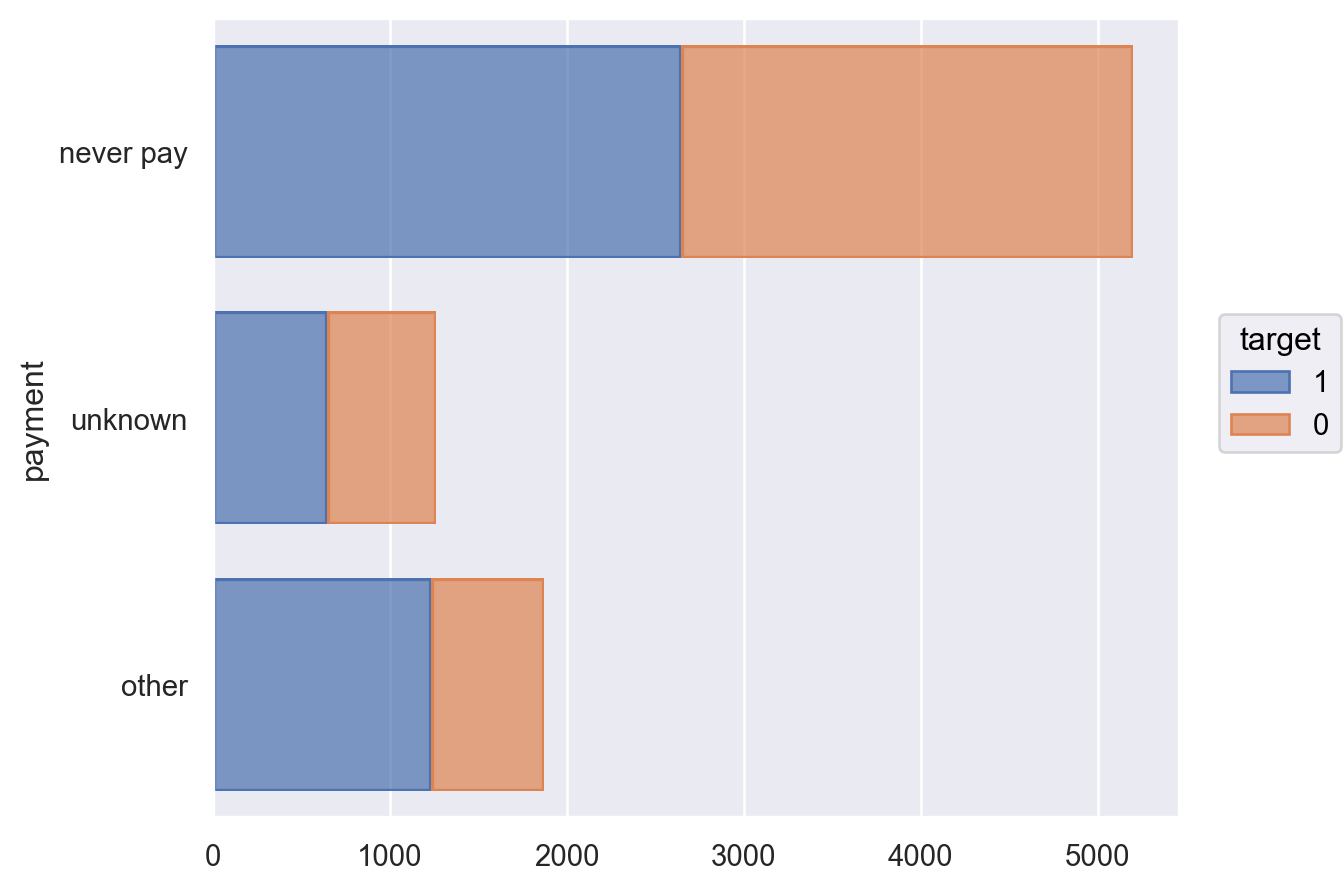

In [39]:
# comparing payment method and target
so.Plot(fdf, y="payment", color="target").add(so.Bar(), so.Count(), so.Stack())

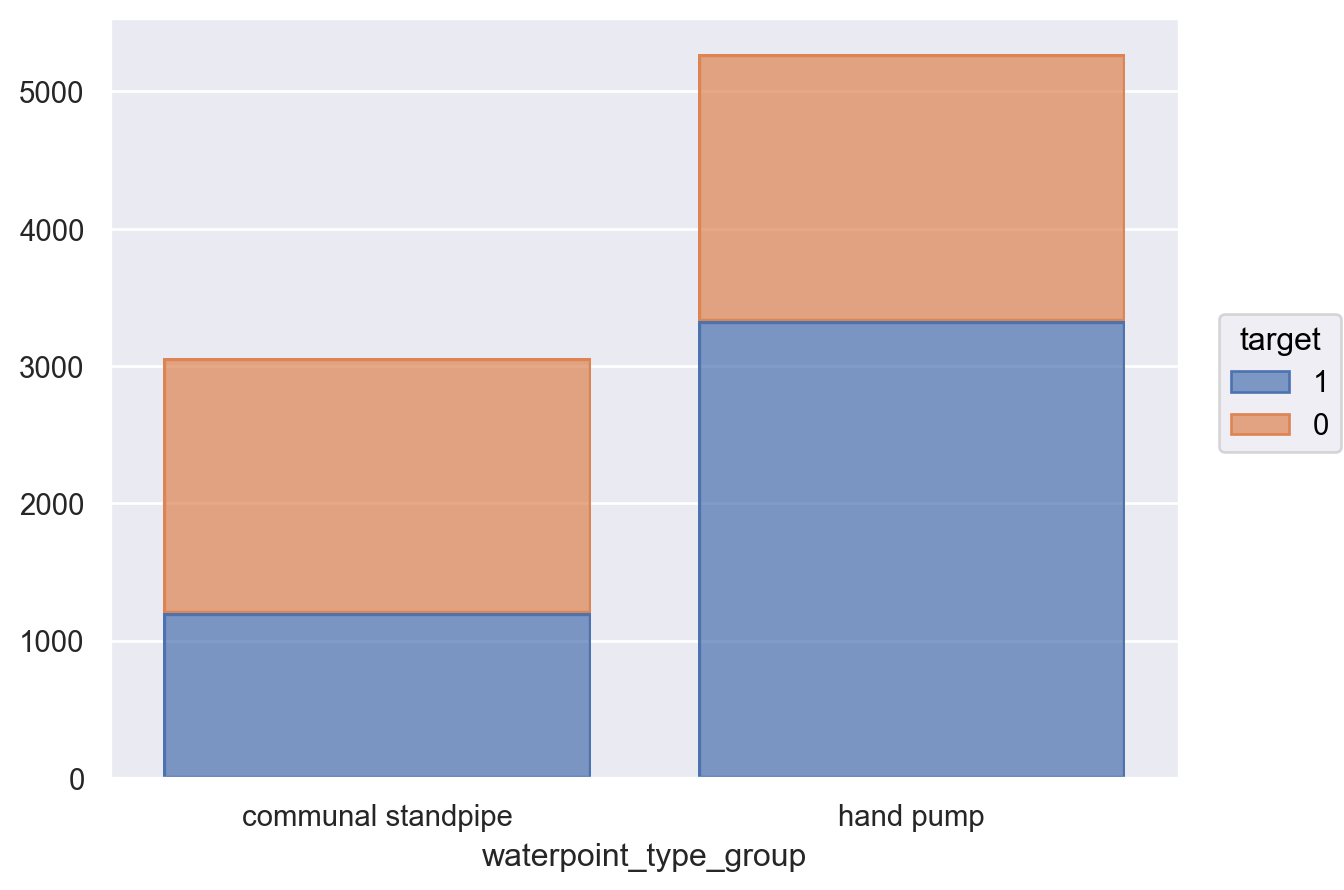

In [40]:
# comparing waterpoint type and target
so.Plot(fdf, x="waterpoint_type_group", color="target").add(so.Bar(), so.Count(), so.Stack())

In [41]:
# comparing percentages of functioning vs nonfunctioning by extraction type class
print('Functioning Wells % by')
print(fdf["waterpoint_type_group"].loc[fdf['target'] == '1'].value_counts(normalize=True) * 100)
print('___________')
print('Nonfunctioning Wells % by')
print(fdf["waterpoint_type_group"].loc[fdf['target'] == '0'].value_counts(normalize=True) * 100)

Functioning Wells % by
waterpoint_type_group
hand pump             73.514469
communal standpipe    26.485531
Name: proportion, dtype: float64
___________
Nonfunctioning Wells % by
waterpoint_type_group
hand pump             51.038654
communal standpipe    48.961346
Name: proportion, dtype: float64


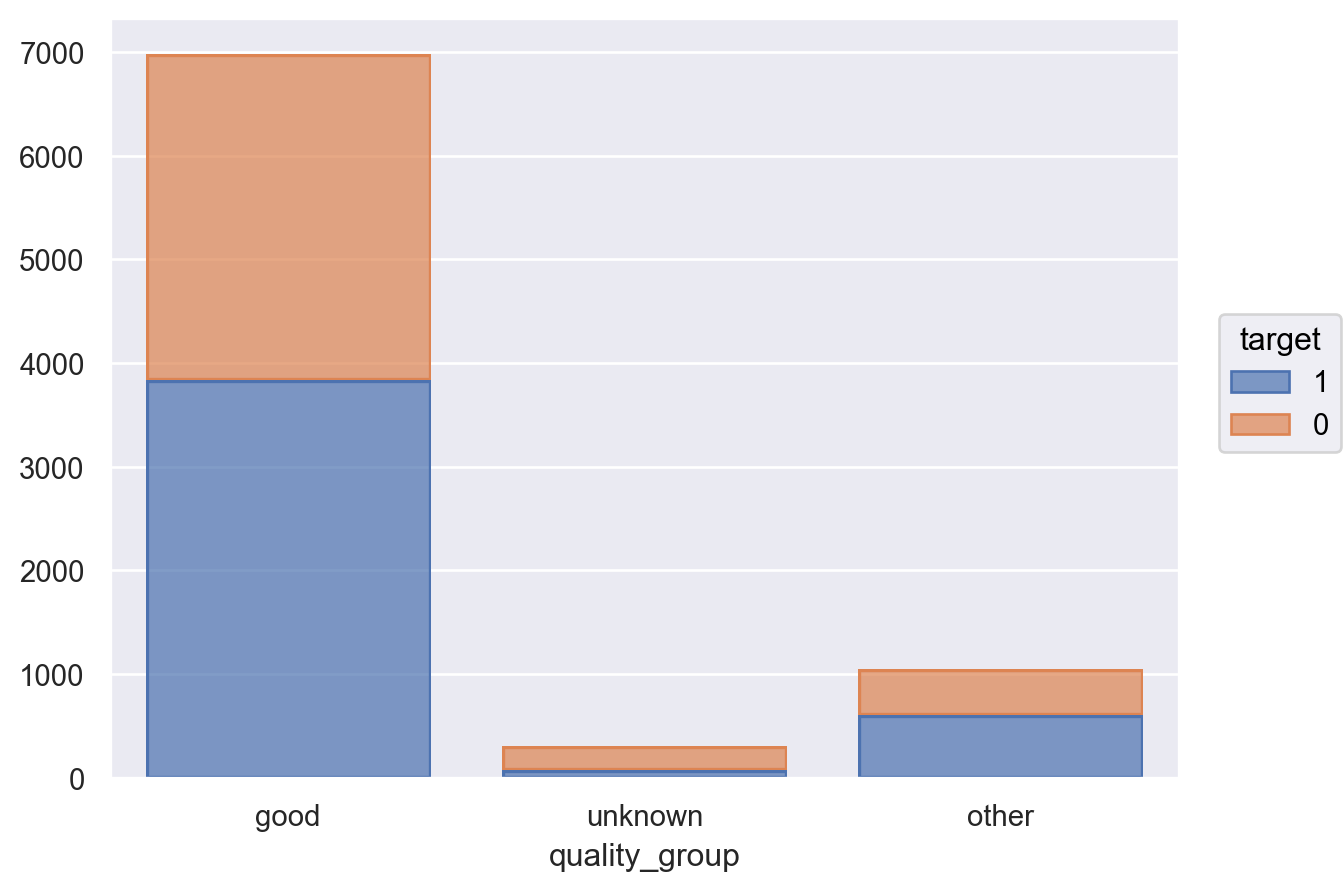

In [42]:
# comparing quality group and target
so.Plot(fdf, x="quality_group", color="target").add(so.Bar(), so.Count(), so.Stack())

In [43]:
# comparing percentages of functioning vs nonfunctioning by extraction type class
print('Functioning Wells % by')
print(fdf["quality_group"].loc[fdf['target'] == '1'].value_counts(normalize=True) * 100)
print('___________')
print('Nonfunctioning Wells % by')
print(fdf["quality_group"].loc[fdf['target'] == '0'].value_counts(normalize=True) * 100)

Functioning Wells % by
quality_group
good       84.824387
other      13.474707
unknown     1.700906
Name: proportion, dtype: float64
___________
Nonfunctioning Wells % by
quality_group
good       82.461215
other      11.596108
unknown     5.942677
Name: proportion, dtype: float64


## EDA Part 2 - Statistical Analysis

After initial EDA, statistical tests were performed to see if any variables are highly correlated. Pearson's correlation was performed on numeric variables. For comparing categorical variables, a Chi-Squared test of independence was used. Using domain knowledge, it was likely that extraction type, source of the water, and the type of well (waterpoint type) might be related. These variables were likely dependent on one another, which would result in multicollinearity in the model. However, despite their significance, it was determined that extraction type, source of the water, and waterpoint type were important features for the stakeholder to consider.

In [44]:
# looking for correlations in our numeric variables
fdf.corr(method='pearson', numeric_only=True)

,gps_height,longitude,latitude
gps_height,1.000000,0.332200,-0.022864
longitude,0.332200,1.000000,-0.821219
latitude,-0.022864,-0.821219,1.000000


In [45]:
# comparing extraction type and source
homogeneity_table1 = pd.crosstab(fdf["extraction_type_class"], fdf["source_class"])
print(homogeneity_table1)

# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table1)

print("Chi-square statistic:", chi2)
print("p-value:", p)

source_class           groundwater  surface  unknown
extraction_type_class                               
manual                        5146       20        5
mechanical                     396      416        1
other                         1195     1142        9
Chi-square statistic: 3074.33292231809
p-value: 0.0


In [46]:
# comparing waterpoint type and source class
homogeneity_table2 = pd.crosstab(fdf["waterpoint_type_group"], fdf["source_class"])
print(homogeneity_table2)

# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table2)

print("Chi-square statistic:", chi2)
print("p-value:", p)

source_class           groundwater  surface  unknown
waterpoint_type_group                               
communal standpipe            1513     1543        5
hand pump                     5224       35       10
Chi-square statistic: 3120.9459742088507
p-value: 0.0


In [47]:
# comparing extraction type and waterpoint type
homogeneity_table3 = pd.crosstab(fdf["extraction_type_class"], fdf["waterpoint_type_group"])
print(homogeneity_table3)

# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table3)

print("Chi-square statistic:", chi2)
print("p-value:", p)

waterpoint_type_group  communal standpipe  hand pump
extraction_type_class                               
manual                                 63       5108
mechanical                            803         10
other                                2195        151
Chi-square statistic: 7411.935370052781
p-value: 0.0


# Training the Model

## Performing Train-Test Split

After EDA was complete, the data was split into a training and testing set to ensure no data leakage. This was before performing any preprocessing steps. 

Latitude, longitude, and gps height (aka altitude) would likely be highly multicollinear, and also did not seem relevant for the scope of this analysis, and therefore were left out of the training and testing data.

In [48]:
# train-test split

X = fdf.drop(["target", "latitude", "longitude", "gps_height"], axis=1)
y = fdf["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [49]:
# checking the shapes to make sure they look correct
X_train.shape

(6247, 7)

In [50]:
# checking the shapes to make sure they look correct
y_train.shape

(6247,)

In [51]:
# checking the shapes to make sure they look correct
X_test.shape

(2083, 7)

In [52]:
# checking the shapes to make sure they look correct
y_test.shape

(2083,)

In [53]:
# making sure we have the variables we need
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6247 entries, 3438 to 23277
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   region                 6247 non-null   object
 1   extraction_type_class  6247 non-null   object
 2   management_group       6247 non-null   object
 3   payment                6247 non-null   object
 4   quality_group          6247 non-null   object
 5   source_class           6247 non-null   object
 6   waterpoint_type_group  6247 non-null   object
dtypes: object(7)
memory usage: 390.4+ KB


## Preprocessing

The first preprocessing step was performing One Hot Encoding. Since all of the relevant variables are categorical and no values were missing, this was relatively straightforward. 

In [54]:
# instantiate the OneHotEncoder
ohe = OneHotEncoder()

# fit the ohe on our training set
ohe.fit(X_train)

# transform columns and convert our encoded matrix back into a dataframe
X_train_encoded = pd.DataFrame(ohe.transform(X_train).todense(),
                               columns=ohe.get_feature_names_out())

# sanity check
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247 entries, 0 to 6246
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region_Arusha                             6247 non-null   float64
 1   region_Kagera                             6247 non-null   float64
 2   region_Mara                               6247 non-null   float64
 3   region_Mwanza                             6247 non-null   float64
 4   region_Shinyanga                          6247 non-null   float64
 5   extraction_type_class_manual              6247 non-null   float64
 6   extraction_type_class_mechanical          6247 non-null   float64
 7   extraction_type_class_other               6247 non-null   float64
 8   management_group_commercial               6247 non-null   float64
 9   management_group_other                    6247 non-null   float64
 10  management_group_parastatal         

## Baseline (Dummy) Model

After performing our preprocessing, a baseline model was performed using SKLearn's Dummy Classifier to determine the value of the target that appears most frequently. 

In [55]:
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train_encoded, y_train)

# predicting the first 10
dummy_model.predict(X_train_encoded)[:10]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

The target that appears most frequently is 1, which is representative of a functioning well. In order to double check this, it was important to look at the proportion of functioning to nonfunctioning wells in the training set, which validated that 1 appears most frequently. If the model were to predict 1 each time, it would be accurate 54% of the time. This serves as a good baseline to use as a comparison for the model. 

In [56]:
# checking the ratio of 1 to 0 in our training set
print(y_train.value_counts(normalize=True))

target
1    0.543461
0    0.456539
Name: proportion, dtype: float64


# Preliminary Model 1

In order to further determine which predictors of the target are the strongest, a Decision Tree Classifier was used.

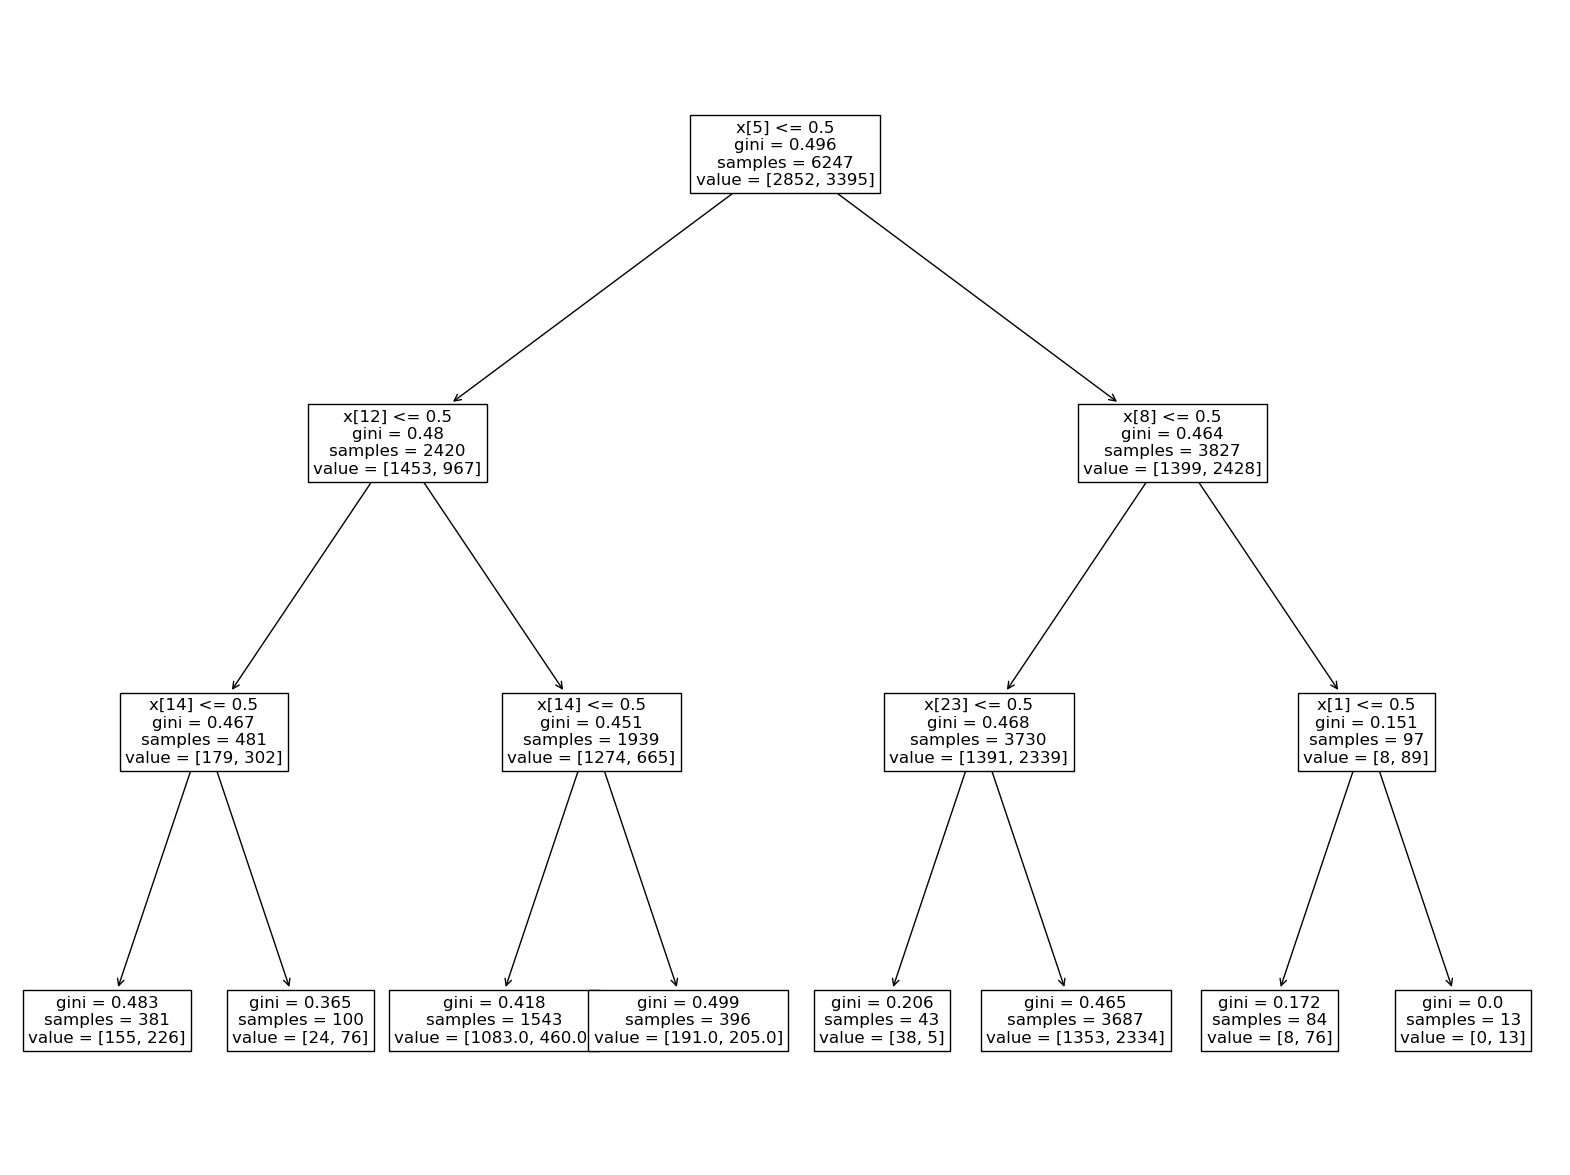

In [57]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# fit to our training set
tree.fit(X_train_encoded, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=12)
plt.show();

Decision trees determine which variables are most significant in a model, and splits the data based on each variable. The further down the tree you go, the more "pure" each group becomes. The goal is to have the most "pure" group possible. 

The tree split first on extraction type, and then split on management group. The next split included payment method, waterpoint type (this is the type of well), and region.

Next, a logistic regression was performed to classify each well based on the predictors. Logistic Regression is an excellent model to use for classification. In this instance, a binary classification was performed to determine whether a well is functioning (1) or not functioning (0). 

Standard scaling was not necessary since all of the variables were categorical and already processed via one hot encoding. 

In [58]:
# instantiating the model
log = LogisticRegression(random_state=42)

# fitting the model to our scaled training set
log.fit(X_train_encoded, y_train)

LogisticRegression(random_state=42)

In [59]:
# predicting our target
y_predict = log.predict(X_train_encoded)
y_predict

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

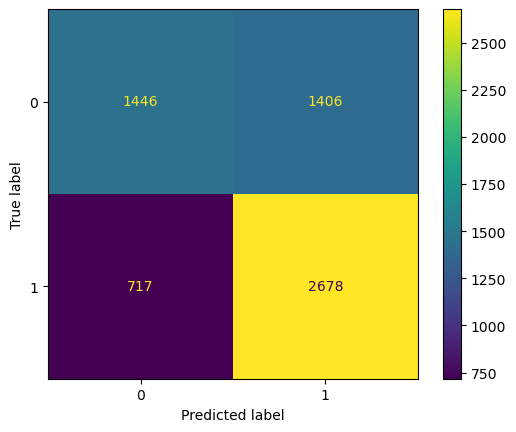

In [60]:
# plotting a confusion matrix to assess our model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [61]:
# printing out an accuracy report to further verify our model

from sklearn.metrics import accuracy_score

training_accuracy = accuracy_score(y_train, y_predict)
training_accuracy

0.6601568753001441

In [62]:
# printing out a full classification report to check precision and recall

from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      2852
           1       0.66      0.79      0.72      3395

    accuracy                           0.66      6247
   macro avg       0.66      0.65      0.65      6247
weighted avg       0.66      0.66      0.65      6247



The initial model did better than our baseline, with an accuracy score of 66%. The evaluation metric chosen to focus on was precision, which is more sensitive to false positives, which in this case means identifying a well as functioning when it is not. It was determined that it would be more detrimental to the NGO to identify a well as functioning when it was actually in need of repair. The precision score of 66% indicated that the initial model was performing better than the baseline model. However, it was necessary to explore the possibility of fine-tuning the model even more. 

# Preliminary Model 2

The second model took into account the regularization of the model to ensure no overfitting occurred. The model was run again adjusting the regularization parameter from 1 (the default) to 0.5. 

In [63]:
# changing the regularization to 0.5
log = LogisticRegression(random_state=42, C=0.5)
log.fit(X_train_encoded, y_train)
y_predict2 = log.predict(X_train_encoded)
y_predict2

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [64]:
print(classification_report(y_train, y_predict2))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58      2852
           1       0.66      0.79      0.72      3395

    accuracy                           0.66      6247
   macro avg       0.66      0.65      0.65      6247
weighted avg       0.66      0.66      0.65      6247



Once again, the accuracy and precision were about 66% after this change. The next step was to transform the test set and run the model on the testing set to assess its performance in making predictions on unseen data. 

# Testing the Model

## Transforming the Test Set

In [65]:
# instantiate the OneHotEncoder
ohe = OneHotEncoder()

# fit the ohe on our training set
ohe.fit(X_test)

# transform columns and convert our encoded matrix back into a dataframe
X_test_encoded = pd.DataFrame(ohe.transform(X_test).todense(),
                               columns=ohe.get_feature_names_out())

# sanity check
X_test_encoded.head()

,region_Arusha,region_Kagera,region_Mara,region_Mwanza,region_Shinyanga,extraction_type_class_manual,extraction_type_class_mechanical,extraction_type_class_other,management_group_commercial,management_group_other,...,payment_other,payment_unknown,quality_group_good,quality_group_other,quality_group_unknown,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [66]:
# making sure we have all the columns we need
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region_Arusha                             2083 non-null   float64
 1   region_Kagera                             2083 non-null   float64
 2   region_Mara                               2083 non-null   float64
 3   region_Mwanza                             2083 non-null   float64
 4   region_Shinyanga                          2083 non-null   float64
 5   extraction_type_class_manual              2083 non-null   float64
 6   extraction_type_class_mechanical          2083 non-null   float64
 7   extraction_type_class_other               2083 non-null   float64
 8   management_group_commercial               2083 non-null   float64
 9   management_group_other                    2083 non-null   float64
 10  management_group_parastatal         

## Modeling the Test Set

In [67]:
# predicting using our regression that was fit to the training set
y_test_predict = log.predict(X_test_encoded)
y_test_predict

array(['1', '0', '1', ..., '0', '1', '1'], dtype=object)

In [68]:
# printing the classification report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.49      0.58       951
           1       0.66      0.82      0.73      1132

    accuracy                           0.67      2083
   macro avg       0.67      0.65      0.65      2083
weighted avg       0.67      0.67      0.66      2083



In [69]:
# printing out the coefficients
coefficients = log.coef_
print("Coefficients:", coefficients)

Coefficients: [[ 0.75833721  0.08553771 -0.66966193  0.12851836 -0.15799856  0.49848682
  -0.35065808 -0.00309596  0.93182345  0.38244545 -0.25113937 -0.01037599
  -0.90802077 -0.35737868  0.39169927  0.11041219  0.46100046  0.29816945
  -0.61443713  0.15993763  0.18722619 -0.20243104 -0.210479    0.35521178]]


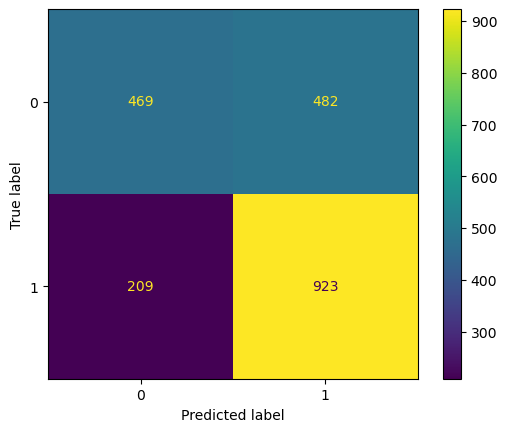

In [70]:
# plotting a confusion matrix to assess our model
cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Interpreting Results

With the model run on unseen data, the next step was to interpret the results in order to make concrete business recommendations. Logistic regression provides coefficients that represent the log-odds of an event occurring, and therefore need to be expontiated in order to be more interpretable. Once exponentiated, one is left with the odds of the event happening. However, it was decided that it would be easier to understand probability, and therefore the odds were converted to probabilites.

In [71]:
# converting from log-odds to probabilities using a list comprehension from this source: https://stackoverflow.com/questions/51006193/interpreting-logistic-regression-feature-coefficient-values-in-sklearn
probabilities = [np.exp(x)/(1 + np.exp(x)) for x in coefficients[0]]
probabilities

[0.6809926150819248,
 0.5213713979384738,
 0.3385725441771756,
 0.532085439323957,
 0.4605823254181342,
 0.6221036618974064,
 0.41322284799345416,
 0.4992260113105907,
 0.7174450781475488,
 0.5944627804184235,
 0.4375430818139921,
 0.49740602628718644,
 0.2874050202936819,
 0.4115942616354281,
 0.5966916978276982,
 0.5275750390157711,
 0.6132514868085608,
 0.5739949621094583,
 0.3510476948418757,
 0.5398993919309092,
 0.5466702971223839,
 0.44956435287307284,
 0.4475736533904264,
 0.5878808500442273]

In [72]:
# creating a dictionary of the probabilites that's easier to read
dict_of_probs = {0.6809926151:'region_Arusha', 0.5213713979:'region_Kagera', 0.3385725442:'region_Mara', 0.5320854393:'region_Mwanza', 0.4605823254:'region_Shinyanga', 0.6221036619:'extraction_type_class_manual', 0.413222848:'extraction_type_class_mechanical', 0.4992260113:'extraction_type_class_other', 0.7174450781:'management_group_commercial', 0.5944627804:'management_group_other', 0.4375430818:'management_group_parastatal', 0.4974060263:'management_group_unknown', 0.2874050203:'management_group_user-group', 0.4115942616:'payment_never pay', 0.5966916978:'payment_other', 0.527575039:'payment_unknown', 0.6132514868:'quality_group_good', 0.5739949621:'quality_group_other', 0.3510476948:'quality_group_unknown', 0.5398993919:'source_class_groundwater', 0.5466702971:'source_class_surface', 0.4495643529:'source_class_unknown', 0.4475736534:'waterpoint_type_group_communal standpipe', 0.58788085:'waterpoint_type_group_hand pump'}
dict_of_probs

{0.6809926151: 'region_Arusha',
 0.5213713979: 'region_Kagera',
 0.3385725442: 'region_Mara',
 0.5320854393: 'region_Mwanza',
 0.4605823254: 'region_Shinyanga',
 0.6221036619: 'extraction_type_class_manual',
 0.413222848: 'extraction_type_class_mechanical',
 0.4992260113: 'extraction_type_class_other',
 0.7174450781: 'management_group_commercial',
 0.5944627804: 'management_group_other',
 0.4375430818: 'management_group_parastatal',
 0.4974060263: 'management_group_unknown',
 0.2874050203: 'management_group_user-group',
 0.4115942616: 'payment_never pay',
 0.5966916978: 'payment_other',
 0.527575039: 'payment_unknown',
 0.6132514868: 'quality_group_good',
 0.5739949621: 'quality_group_other',
 0.3510476948: 'quality_group_unknown',
 0.5398993919: 'source_class_groundwater',
 0.5466702971: 'source_class_surface',
 0.4495643529: 'source_class_unknown',
 0.4475736534: 'waterpoint_type_group_communal standpipe',
 0.58788085: 'waterpoint_type_group_hand pump'}

## Key Findings:

(1) There’s a 58% probability a hand pump well will be functioning.

(2) Wells that extract water manually are 62% more likely to be functioning.

(3) Wells managed by commercial groups are 72% more likely to be functioning.